In [2]:
!pip install pandas

     ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/11.6 MB 1.1 MB/s eta 0:00:11
      --------------------------------------- 0.3/11.6 MB 1.7 MB/s eta 0:00:07
     - -------------------------------------- 0.5/11.6 MB 2.6 MB/s eta 0:00:05
     - -------------------------------------- 0.6/11.6 MB 2.1 MB/s eta 0:00:06
     --- ------------------------------------ 0.9/11.6 MB 3.1 MB/s eta 0:00:04
     ---- ----------------------------------- 1.2/11.6 MB 3.2 MB/s eta 0:00:04
     ----- ---------------------------------- 1.5/11.6 MB 3.9 MB/s eta 0:00:03
     ------ --------------------------------- 1.9/11.6 MB 4.3 MB/s eta 0:00:03
     -------- ------------------------------- 2.4/11.6 MB 4.9 MB/s eta 0:00:02
     --------- ------------------------------ 2.8/11.6 MB 5.2 MB/s eta 0:


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\chava\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
# 1. Import libraries
import pandas as pd
import numpy as np
import zipfile
import os



# 4. Load the dataset
# If needed, manually set the correct file name from the extracted_files list
excel_file_path = os.path.join( 'Adidas US Sales Datasets.xlsx')  # Adjust if name differs
df = pd.read_excel(excel_file_path)

# 5. Explore the data
print(df.head())        # Show first few rows
print(df.info())        # Check data types and missing values
print(df.describe())    # Basic statistics we have already done this we just need to perform the requiremnets now

   Unnamed: 0   Unnamed: 1             Unnamed: 2           Unnamed: 3  \
0         NaN          NaN  Adidas Sales Database                  NaN   
1         NaN          NaN                    NaN                  NaN   
2         NaN          NaN                    NaN                  NaN   
3         NaN     Retailer            Retailer ID         Invoice Date   
4         NaN  Foot Locker                1185732  2020-01-01 00:00:00   

  Unnamed: 4 Unnamed: 5 Unnamed: 6             Unnamed: 7      Unnamed: 8  \
0        NaN        NaN        NaN                    NaN             NaN   
1        NaN        NaN        NaN                    NaN             NaN   
2        NaN        NaN        NaN                    NaN             NaN   
3     Region      State       City                Product  Price per Unit   
4  Northeast   New York   New York  Men's Street Footwear              50   

   Unnamed: 9  Unnamed: 10       Unnamed: 11       Unnamed: 12   Unnamed: 13  
0         NaN

In [5]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\chava\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
# Reload the dataset properly
df = pd.read_excel(excel_file_path, skiprows=4)  # Skip 4 rows

# Drop the useless first column 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

# Show clean data
print(df.head())
print(df.info())


      Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Method  
0          300000.0              0.50     In-store  
1   

In [8]:
# 1. Check missing values
print(df.isnull().sum())

# 2. Ensure 'Invoice Date' is in datetime format
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# 3. Create new columns (optional but helpful)
df['Year'] = df['Invoice Date'].dt.year
df['Month'] = df['Invoice Date'].dt.month
df['Day'] = df['Invoice Date'].dt.day
df['DayOfWeek'] = df['Invoice Date'].dt.day_name()

# 4. Maybe fix categories (Retailer, Region, State, City, Product, Sales Method)
categorical_cols = ['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method']
for col in categorical_cols:
    df[col] = df[col].astype('category')


Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


C:\Users\chava\AppData\Local\Temp\ipykernel_23020\2877439858.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(5)


Top 5 Products by Total Sales:
Product
Men's Street Footwear      208826244.0
Women's Apparel            179038860.0
Men's Athletic Footwear    153673680.0
Women's Street Footwear    128002813.0
Men's Apparel              123728632.0
Name: Total Sales, dtype: float64


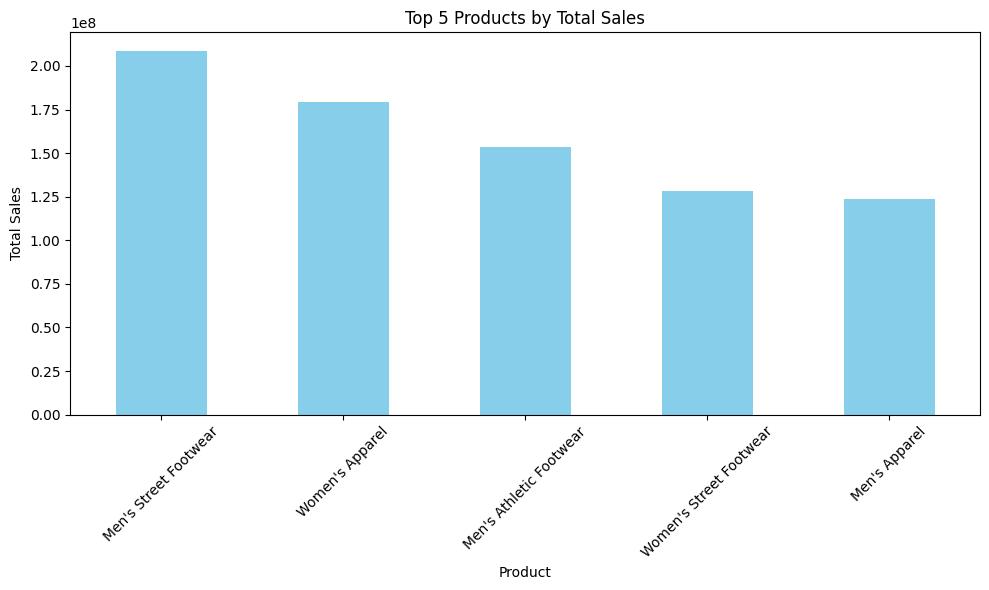


Sales Trend Over Time:
Invoice Date
2020-01-01    845141.0
2020-01-02    689410.0
2020-01-03    632573.0
2020-01-04    615080.0
2020-01-05    707829.0
                ...   
2021-12-27    602353.0
2021-12-28    301010.0
2021-12-29    211109.0
2021-12-30    167903.0
2021-12-31    198659.0
Name: Total Sales, Length: 724, dtype: float64


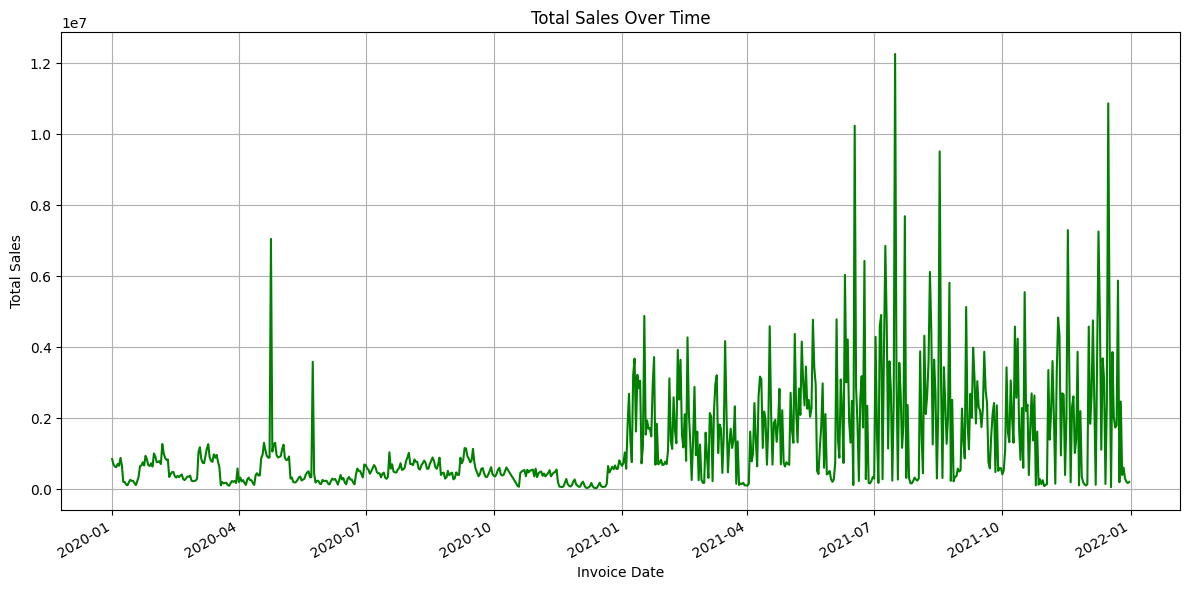


Sales by Region:
Region
Midwest      135800459.0
Northeast    186324067.0
South        144663181.0
Southeast    163171236.0
West         269943182.0
Name: Total Sales, dtype: float64


C:\Users\chava\AppData\Local\Temp\ipykernel_23020\2877439858.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_region = df.groupby('Region')['Total Sales'].sum()


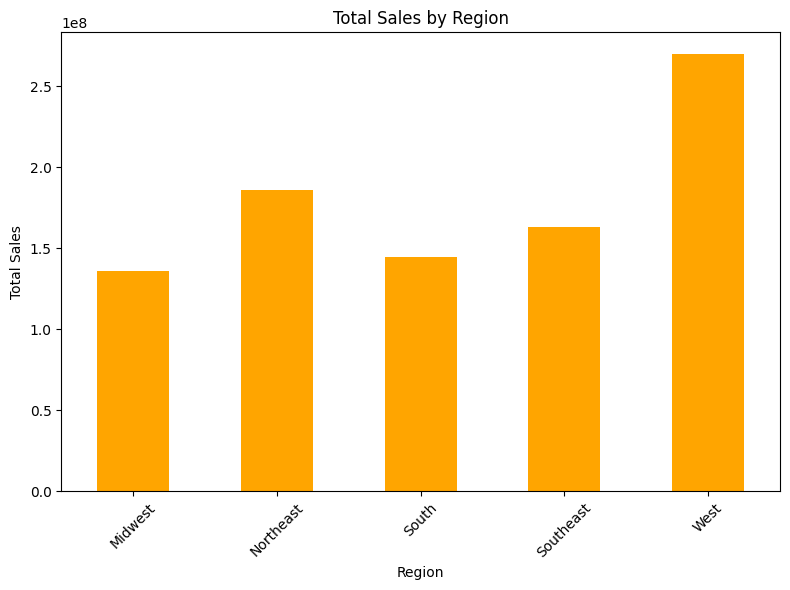


Profit Margin Summary Statistics:
count    9648.000000
mean        0.422991
std         0.097197
min         0.100000
25%         0.350000
50%         0.410000
75%         0.490000
max         0.800000
Name: Operating Margin, dtype: float64

Sales Method Split (%):
Sales Method
Online      50.673715
Outlet      31.291459
In-store    18.034826
Name: proportion, dtype: float64


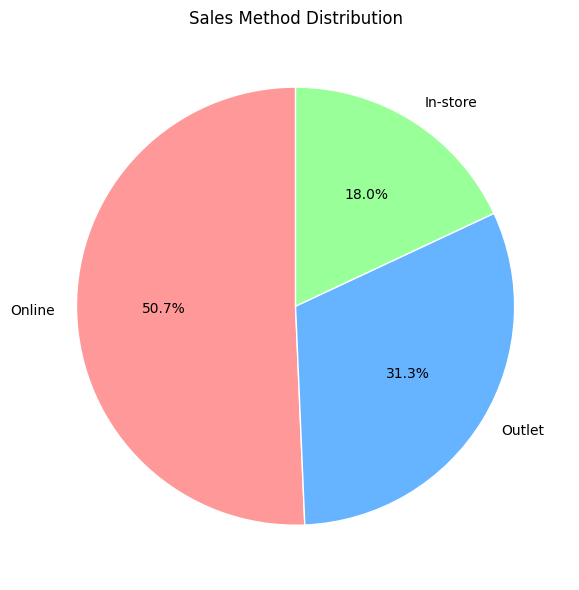

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your cleaned DataFrame is called 'df'

# 1. Top 5 Products by Total Sales
top_products = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Total Sales:")
print(top_products)

# Plot Top 5 Products
top_products.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.title('Top 5 Products by Total Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Sales Trend Over Time
sales_trend = df.groupby('Invoice Date')['Total Sales'].sum()
print("\nSales Trend Over Time:")
print(sales_trend)

# Plot Sales Trend
sales_trend.plot(figsize=(12,6), color='green')
plt.title('Total Sales Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


# 3. Sales by Region
sales_by_region = df.groupby('Region')['Total Sales'].sum()
print("\nSales by Region:")
print(sales_by_region)

# Plot Sales by Region
sales_by_region.plot(kind='bar', color='orange', figsize=(8,6))
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4. Profit Margin Analysis
profit_margin_summary = df['Operating Margin'].describe()
print("\nProfit Margin Summary Statistics:")
print(profit_margin_summary)


# 5. Sales Method Split
sales_method_split = df['Sales Method'].value_counts(normalize=True) * 100
print("\nSales Method Split (%):")
print(sales_method_split)

# Plot Sales Method Split (with 3 different colors)
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Red, Blue, Green

sales_method_split.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    figsize=(6,6),
    wedgeprops={'edgecolor': 'white'}  # Optional: makes slices look cleaner
)
plt.title('Sales Method Distribution')
plt.ylabel('')  # Hide y-label
plt.tight_layout()
plt.show()



In [10]:
!pip install matplotlib

     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.1 MB 1.4 MB/s eta 0:00:06
      --------------------------------------- 0.1/8.1 MB 1.4 MB/s eta 0:00:06
     -- ------------------------------------- 0.4/8.1 MB 3.2 MB/s eta 0:00:03
     -- ------------------------------------- 0.5/8.1 MB 3.1 MB/s eta 0:00:03
     ---- ----------------------------------- 0.8/8.1 MB 3.7 MB/s eta 0:00:02
     ----- ---------------------------------- 1.1/8.1 MB 4.2 MB/s eta 0:00:02
     ------ --------------------------------- 1.4/8.1 MB 4.6 MB/s eta 0:00:02
     ------- -------------------------------- 1.6/8.1 MB 4.7 MB/s eta 0:00:02
     -------- ------------------------------- 1.7/8.1 MB 4.7 MB/s eta 0:00:02
     --------- ------------------------------ 1.9/8.1 MB 4.5 MB/s eta 0:00:02
     --------- ------------------------------ 2.0/8.1 MB 4.4 MB/s eta 0:00:02
     ----------- ---------------------------- 2.4/8.1 MB 4.8 MB/s eta 0


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\chava\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
Year                0
Month               0
Day                 0
DayOfWeek           0
dtype: int64


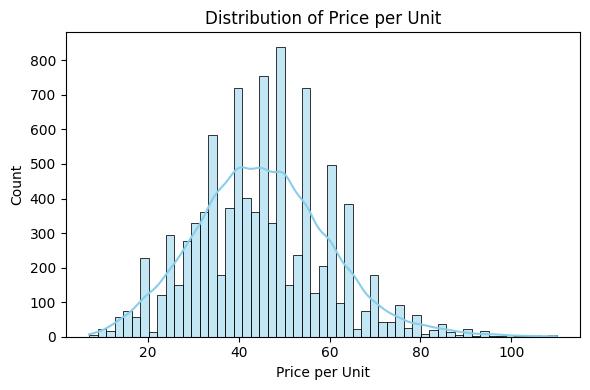

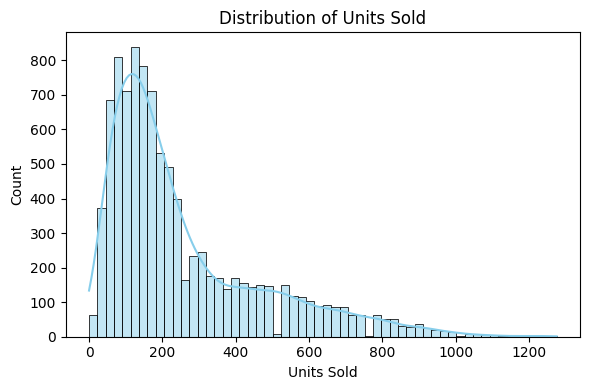

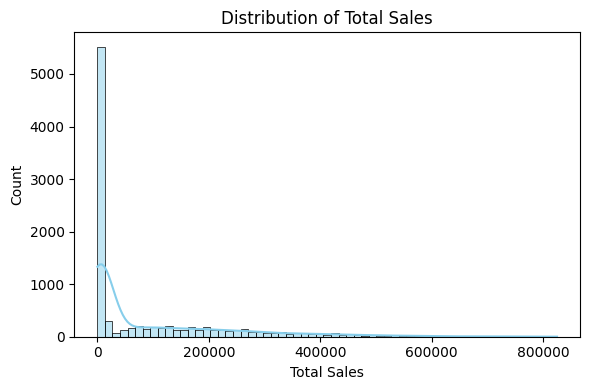

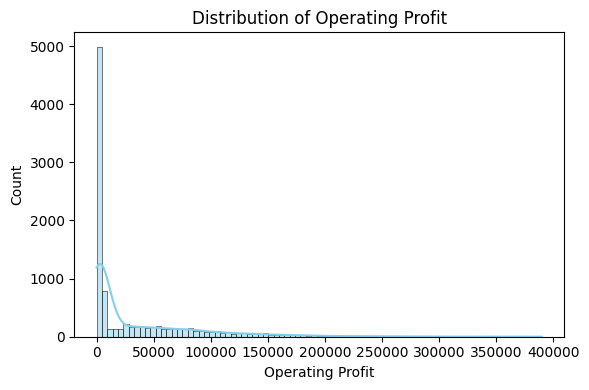

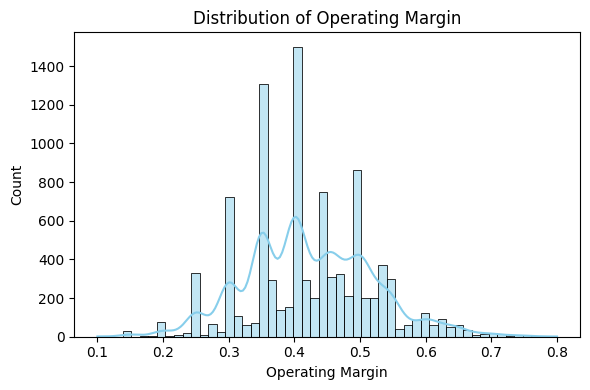

C:\Users\chava\AppData\Local\Temp\ipykernel_23020\2687335340.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="pastel")


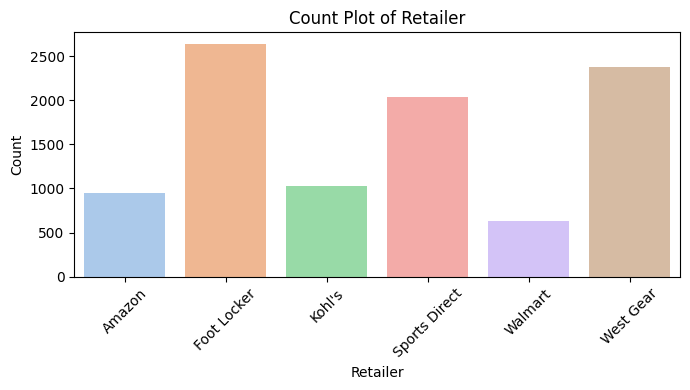

C:\Users\chava\AppData\Local\Temp\ipykernel_23020\2687335340.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="pastel")


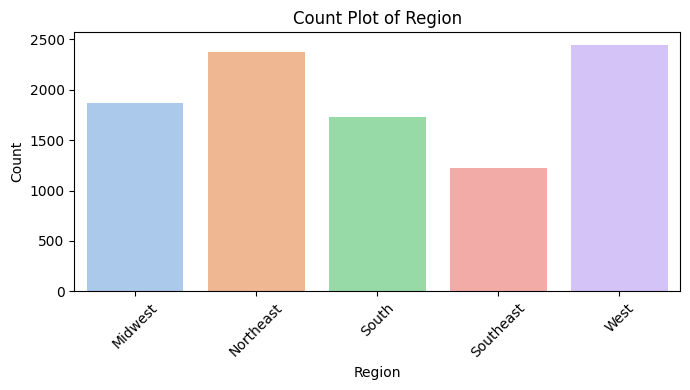

C:\Users\chava\AppData\Local\Temp\ipykernel_23020\2687335340.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="pastel")


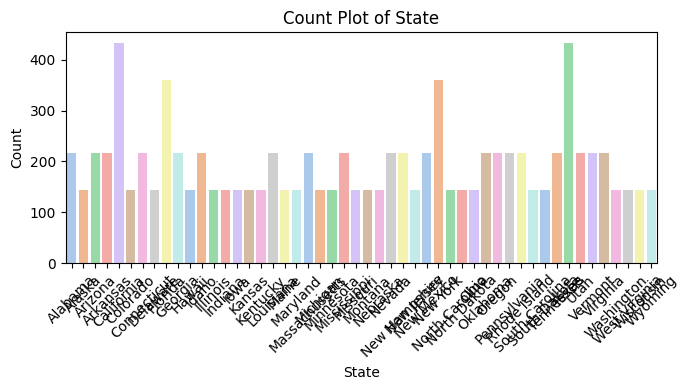

C:\Users\chava\AppData\Local\Temp\ipykernel_23020\2687335340.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="pastel")


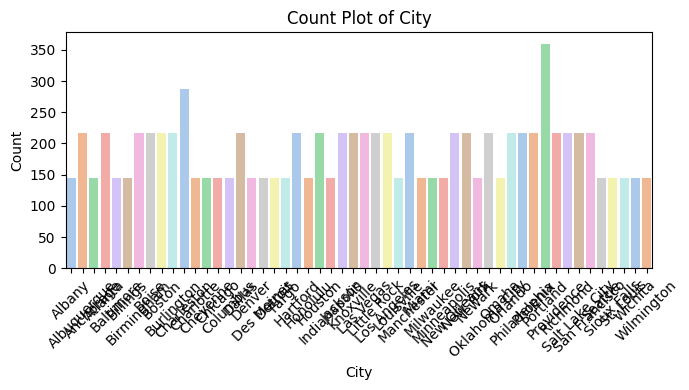

C:\Users\chava\AppData\Local\Temp\ipykernel_23020\2687335340.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="pastel")


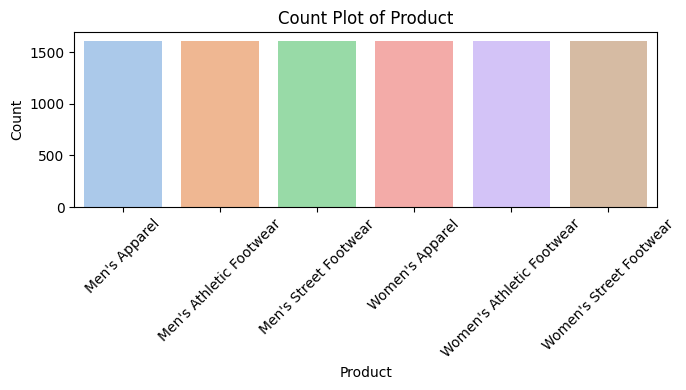

C:\Users\chava\AppData\Local\Temp\ipykernel_23020\2687335340.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="pastel")


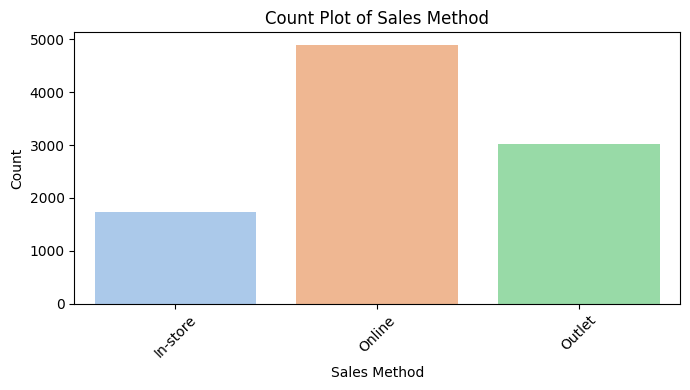

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Check for missing values
print(df.isnull().sum())


# 2. Univariate Analysis - Numerical Features
numerical_features = ["Price per Unit", "Units Sold", "Total Sales", "Operating Profit", "Operating Margin"]

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, color="skyblue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


# 3. Univariate Analysis - Categorical Features
categorical_features = ["Retailer", "Region", "State", "City", "Product", "Sales Method"]

for feature in categorical_features:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=feature, data=df, palette="pastel")
    plt.title(f"Count Plot of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




In [13]:
!pip install seaborn 

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\chava\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
# 1. Separate target and features
y = df['Total Sales']
X = df.select_dtypes(include=[np.number]).drop(columns=['Total Sales'])

# 🚨 New step: Handle NaNs
X = X.fillna(0)  # Fill NaNs with 0, OR you can use X.fillna(X.mean()) to fill with column mean

# 2. Apply SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)

# 3. See feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print("\nFeature Scores:\n", feature_scores)

# 4. Pick top features
top_features = feature_scores['Feature'].head(8).tolist()
print("\nTop Selected Features:", top_features)

# 5. Final feature set
X_selected = X[top_features]



Feature Scores:
             Feature          Score
3  Operating Profit  103204.272170
2        Units Sold   48587.686101
1    Price per Unit    2261.625390
4  Operating Margin    1478.784075
5              Year     164.853742
0       Retailer ID      67.856738
6             Month      19.620242
7               Day       2.943771

Top Selected Features: ['Operating Profit', 'Units Sold', 'Price per Unit', 'Operating Margin', 'Year', 'Retailer ID', 'Month', 'Day']


In [19]:
!pip install scikit-learn

     ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.1 MB 1.3 MB/s eta 0:00:09
     --------------------------------------- 0.1/11.1 MB 544.7 kB/s eta 0:00:21
     --------------------------------------- 0.1/11.1 MB 655.4 kB/s eta 0:00:17
      -------------------------------------- 0.1/11.1 MB 774.0 kB/s eta 0:00:15
      -------------------------------------- 0.2/11.1 MB 706.2 kB/s eta 0:00:16
      -------------------------------------- 0.3/11.1 MB 923.9 kB/s eta 0:00:12
     - -------------------------------------- 0.4/11.1 MB 1.1 MB/s eta 0:00:11
     - -------------------------------------- 0.4/11.1 MB 1.1 MB/s eta 0:00:11
     - -------------------------------------- 0.5/11.1 MB 1.1 MB/s eta 0:00:10
     - -------------------------------------- 0.6/11.1 MB 1.2 MB/s eta 0:00:09
     -- ------------------------------------- 0.8/11.1 MB 1.5 MB/s eta 0:00:07
     --- ------------------------------------ 1.1/11.1


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\chava\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
# 9. Prepare data for modeling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Example Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score
# First calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Then manually take square root to get RMSE
rmse = mse ** 0.5

print("RMSE:", rmse)
print("R2 Score:", r2_score(y_test, y_pred))


RMSE: 30405.742748510354
R2 Score: 0.9546736207961882


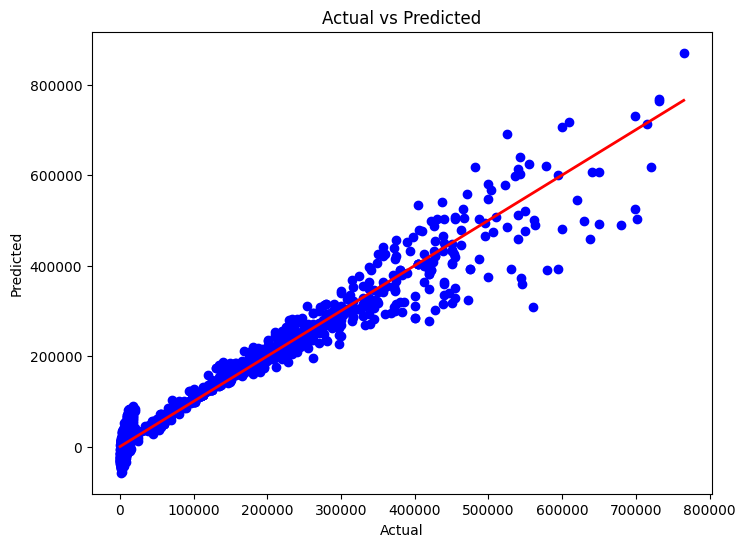

In [22]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Perfect line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [23]:
# If using Linear Regression
importance = model.coef_  # model is your trained model

# Combine features and coefficients
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', key=abs, ascending=False)

print(feature_importance)


            Feature    Importance
0  Operating Profit  94574.192394
1        Units Sold  36084.541945
3  Operating Margin -18753.519274
2    Price per Unit  12544.369890
4              Year   1384.081854
6             Month  -1044.171734
7               Day   -167.861424
5       Retailer ID   -160.741903


In [24]:
from sklearn.model_selection import cross_val_score

# 5-Fold Cross Validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-Validation R2 Scores:", scores)
print("Average R2 Score:", scores.mean())



Cross-Validation R2 Scores: [  0.78564934   0.97361267  -0.40233936 -56.17563624 -63.72215602]
Average R2 Score: -23.708173923755897


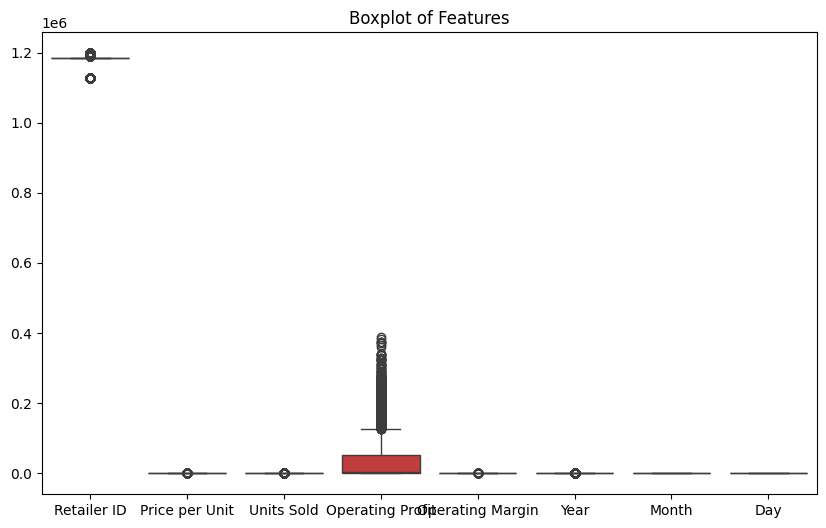

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.title('Boxplot of Features')
plt.show()


In [26]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)  # Keep only best 5 features
X_new = selector.fit_transform(X, y)


In [27]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)


In [28]:
from sklearn.model_selection import cross_val_score

# Assuming your new model is called "ridge_model" or "lasso_model"
cv_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='r2')

print("Cross-Validation R2 Scores:", cv_scores)
print("Average R2 Score:", np.mean(cv_scores))


Cross-Validation R2 Scores: [  0.78497149   0.97352767  -0.38880711 -55.72722137 -63.05436213]
Average R2 Score: -23.48237828883007


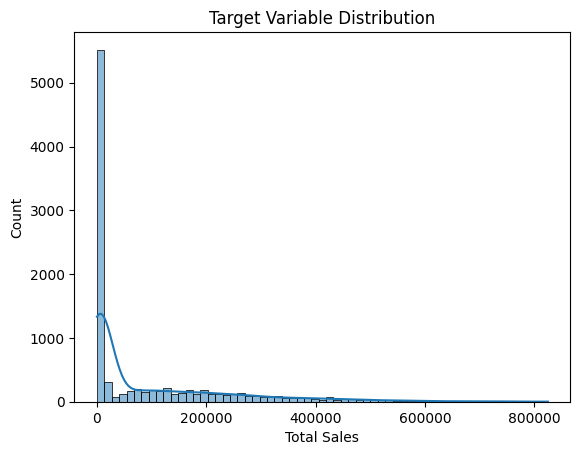

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y, kde=True)
plt.title('Target Variable Distribution')
plt.show()


In [30]:
from sklearn.model_selection import train_test_split

# X and y should already be defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  # You can tune alpha later
ridge_model.fit(X_train_scaled, y_train)


Ridge()

In [33]:
y_pred = ridge_model.predict(X_test_scaled)


In [34]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 924435202.2436197
RMSE: 30404.526015769752
R2 Score: 0.9546772483336957


In [35]:
import joblib

# Save the model
joblib.dump(ridge_model, 'ridge_model.pkl')

# Save the scaler (if you scaled X_train and X_test)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [36]:
import joblib

# Load the saved Ridge model
ridge_model = joblib.load('ridge_model.pkl')

# Load the saved Scaler
scaler = joblib.load('scaler.pkl')


In [37]:
print(X.columns)


Index(['Retailer ID', 'Price per Unit', 'Units Sold', 'Operating Profit',
       'Operating Margin', 'Year', 'Month', 'Day'],
      dtype='object')


In [38]:
# 1. Train the model again
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X and y are ready
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 2. Save the model and scaler
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('ridge_model.pkl', 'wb') as f:
    pickle.dump(ridge_model, f)


In [39]:
scaler = pickle.load(open('scaler.pkl', 'rb'))
model = pickle.load(open('ridge_model.pkl', 'rb'))


In [40]:
import numpy as np
import pickle

# 1. Load the saved scaler and model
scaler = pickle.load(open('scaler.pkl', 'rb'))
model = pickle.load(open('ridge_model.pkl', 'rb'))

# 2. Prepare your new data point
# Important: Follow the **exact same feature order** you told me:
# ['Retailer ID', 'Price per Unit', 'Units Sold', 'Operating Profit', 'Operating Margin', 'Year', 'Month', 'Day']
new_data = np.array([
    [40.0, 50, 8000, 0.4, 2021, 10, 31, 2]  # Year, Month, Day, DayOfWeek (Tuesday)
])
# 3. Scale the new data
new_data_scaled = scaler.transform(new_data)

# 4. Predict
prediction = model.predict(new_data_scaled)

print("Prediction:", prediction[0])


Prediction: -396756812.202734


C:\Users\chava\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
import pandas as pd

new_data = pd.DataFrame([[205, 95, 300, 25000, 0.25, 2024, 3, 15]],
                        columns=['Retailer ID', 'Price per Unit', 'Units Sold', 'Operating Profit', 'Operating Margin', 'Year', 'Month', 'Day'])

new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
print("Prediction:", prediction[0])


Prediction: 181210.39028683596


In [42]:
import numpy as np

# Example: first row (Retailer ID 104)
covid_sample = np.array([[104, 85, 200, 3000, 3.5, 2020, 5, 20]])

# Scale the sample
covid_sample_scaled = scaler.transform(covid_sample)

# Predict
prediction = model.predict(covid_sample_scaled)
print("Predicted Sales Revenue:", prediction[0])


Predicted Sales Revenue: -527002.2796572525


C:\Users\chava\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 3. Predict
y_pred = rf_model.predict(X_test)

# 4. Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


MSE: 19527436.724957414
RMSE: 4418.985938533569
R2 Score: 0.9990426184948207


In [44]:
import pickle

# Save
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Load
with open('rf_model.pkl', 'rb') as f:
    model = pickle.load(f)


In [45]:
new_data = pd.DataFrame([[205, 95, 300, 25000, 0.25, 2024, 3, 15]],
                        columns=['Retailer ID', 'Price per Unit', 'Units Sold', 'Operating Profit', 'Operating Margin', 'Year', 'Month', 'Day'])

In [46]:
# Example new data input (same feature order as X)
new_data = np.array([
    [118, 40.0, 50, 8000, 80, 2021, 10, 31]  # Year, Month, Day, DayOfWeek (Tuesday)
]) # Example values
prediction = model.predict(new_data)
prediction = np.maximum(prediction, 0)  # Clip negatives
print(f"Predicted Sales Revenue: {prediction[0]}")


Predicted Sales Revenue: 12371.74


C:\Users\chava\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [47]:
import pickle
import numpy as np
import pandas as pd

# Load the model
with open('rf_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Take input from user
retailer_id = int(input("Enter Retailer ID: "))
price_per_unit = float(input("Enter Price per Unit: "))
units_sold = int(input("Enter Units Sold: "))
operating_profit = float(input("Enter Operating Profit: "))
operating_margin = float(input("Enter Operating Margin (example 0.25): "))
year = int(input("Enter Year (example 2024): "))
month = int(input("Enter Month (example 3 for March): "))
day = int(input("Enter Day (example 15): "))

# Create input in correct order
new_data = np.array([
    [retailer_id, price_per_unit, units_sold, operating_profit, operating_margin, year, month, day]
])

# Predict
prediction = model.predict(new_data)
prediction = np.maximum(prediction, 0)  # Clip negatives

print(f"\n✅ Predicted Total Sales Revenue: {prediction[0]:.2f}")



✅ Predicted Total Sales Revenue: 1298.73


C:\Users\chava\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


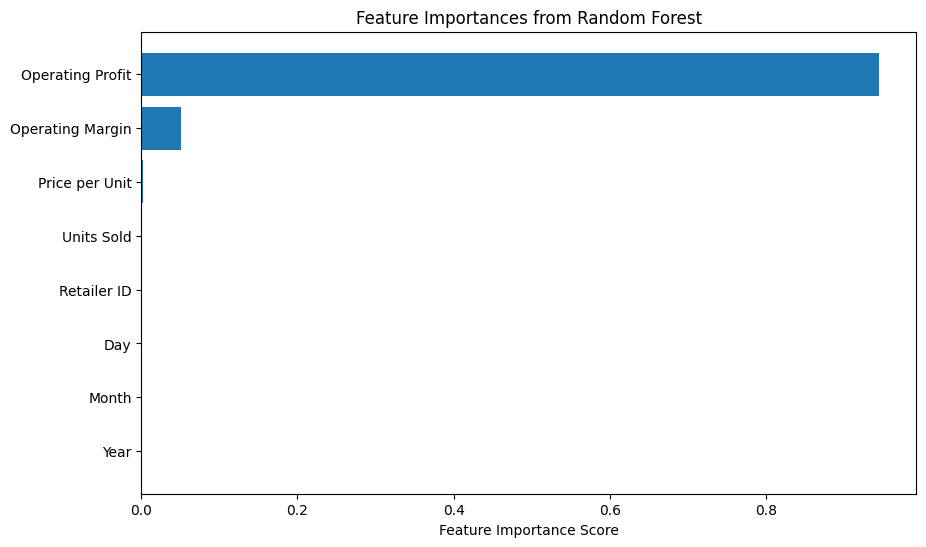

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from Random Forest
importances = model.feature_importances_
feature_names = X.columns  # make sure X is your training data

# Create DataFrame for easy visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance Score')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
1